## 3.4 comparing stocks 주식 비교하기

### 3.4.1 yfinance로 주식 시세 구하기

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# for simplicity, set start after sec's equity split(액면 분할)
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')  # Samsung Elctronics Company/if a company sits in KOSDAQ, use .KQ instead of .KS
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# check the loaded data
# OHLC + Ajd Close + Vol.
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,44821.148438,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,45425.679688,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,43957.550781,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,44562.078125,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,44302.992188,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,43266.660156,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,42489.421875,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,43050.765625,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,42662.132812,10365440


In [3]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002
2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993
2023-06-07,331.649994,334.489990,322.500000,323.380005,323.380005
2023-06-08,323.940002,326.640015,323.350006,325.260010,325.260010
2023-06-09,323.934998,328.079987,324.450012,327.529999,327.529999


In [4]:
# index of sec, which is a date
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2023-05-25', '2023-05-26', '2023-05-30', '2023-05-31',
               '2023-06-01', '2023-06-02', '2023-06-05', '2023-06-07',
               '2023-06-08', '2023-06-09'],
              dtype='datetime64[ns]', name='Date', length=1254, freq=None)

In [5]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

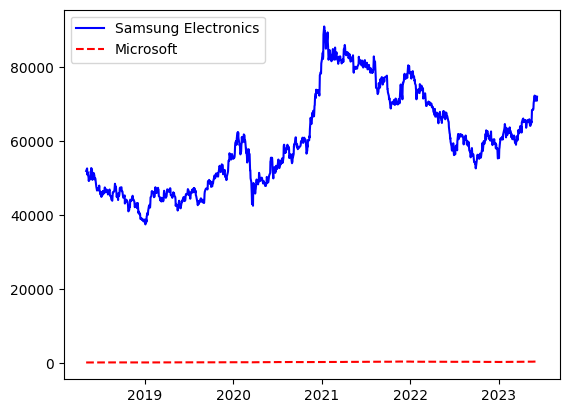

In [6]:
# plotting Close prices of sec vs msft
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

As sec lies between 40000 and 80000 (KRW) and msft lies between 100 to 330 (USD), msft looks like a straight line; which is misleading.

Didn't include currency conversions yet.

### 3.4.2 일간 변동률로 주가 비교하기

Below we compare sec vs. msft using daily returns. (daily percent change):
$$
    R_t = \frac{\text{Close}_t - \text{Close}_{t-1}}{\text{Close}_{t-1}} \times 100
$$

In [7]:
type(sec['Close'])

pandas.core.series.Series

In [8]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2023-06-02    72200.0
2023-06-05    71700.0
2023-06-07    71000.0
2023-06-08    70900.0
2023-06-09    72000.0
Name: Close, Length: 1254, dtype: float64

In [9]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2023-06-02    70900.0
2023-06-05    72200.0
2023-06-07    71700.0
2023-06-08    71000.0
2023-06-09    70900.0
Name: Close, Length: 1254, dtype: float64

In [10]:
# check
(52600/51900 - 1) * 100

1.348747591522148

In [11]:
# daily percent change
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [12]:
# sec_dpc = ((sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) - 1) * 100
# sec_dpc.head()

In [13]:
# using integer location indexer to replace NaN by 0
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

Do the same for MSFT:

In [14]:
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.head()

Date
2018-05-04         NaN
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
2018-05-10    1.000620
Name: Close, dtype: float64

In [15]:
msft_dpc.iloc[0] = 0
msft_dpc.head()

Date
2018-05-04    0.000000
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
2018-05-10    1.000620
Name: Close, dtype: float64

### 3.4.3 daily percent change histogram

plot this for sec and msft, respectively.

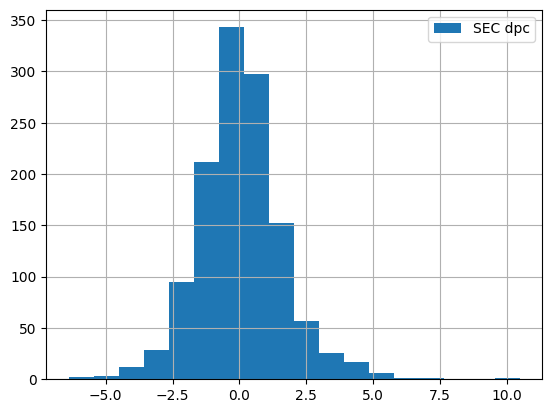

In [24]:
# sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
# sec_dpc.iloc[0] = 0

plt.hist(sec_dpc, bins=18, label='SEC dpc')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Above histogram is approximately a normal distribution, however, it is rather `leptokurtic dist`.(뾰족한 중앙 분포) with `fat tail`.<br>
i.e. almost dpc lies within very small range(*leptokurtic*) and the extreme dpc happens more frequent than that of a normal dist.(*fat tail*).

In [17]:
# check mean and std of sec_dpc
sec_dpc.describe()

count    1254.000000
mean        0.038925
std         1.605469
min        -6.387665
25%        -0.971862
50%         0.000000
75%         0.855615
max        10.470588
Name: Close, dtype: float64

Do the same for MSFT:

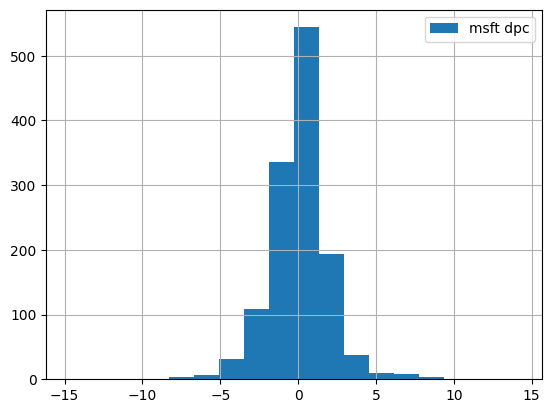

In [25]:
plt.hist(msft_dpc, bins=18, label='msft dpc')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [26]:
msft_dpc.describe()

count    1284.000000
mean        0.115253
std         1.946796
min       -14.739031
25%        -0.831350
50%         0.098033
75%         1.093391
max        14.216888
Name: Close, dtype: float64

### 3.4.4 일간 변동률 누적합 구하기



In [28]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2023-06-02    49.070685
2023-06-05    48.378164
2023-06-07    47.401874
2023-06-08    47.261029
2023-06-09    48.812510
Name: Close, Length: 1254, dtype: float64

In [29]:
msft_dpc_cs = msft_dpc.cumsum()
msft_dpc_cs

Date
2018-05-04      0.000000
2018-05-07      1.113911
2018-05-08      0.687800
2018-05-09      1.867223
2018-05-10      2.867843
                 ...    
2023-06-05    150.465670
2023-06-06    149.792928
2023-06-07    146.706142
2023-06-08    147.287503
2023-06-09    147.985402
Name: Close, Length: 1284, dtype: float64

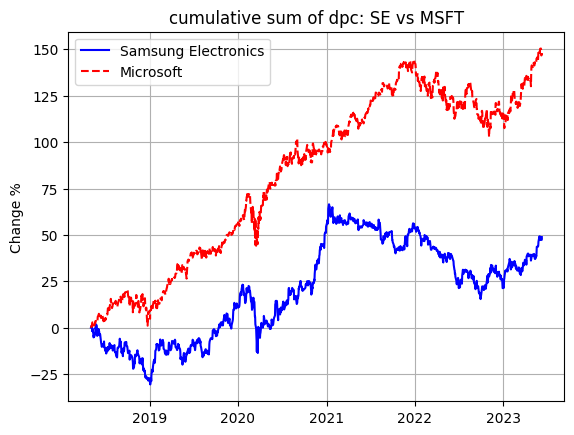

In [49]:
# plot this cumsum of dpc
# sec vs. msft
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.title('cumulative sum of dpc: SE vs MSFT')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Digression

Below(SPY, AAPL, TSLA, and BBYB) is just my experiment:

In [33]:
# For SPY, AAPL, TSLA, & BBYB
SPY = pdr.get_data_yahoo('SPY', start='2018-05-04')
AAPL = pdr.get_data_yahoo('AAPL', start='2018-05-04')
TSLA = pdr.get_data_yahoo('TSLA', start='2018-05-04')
BBYB = pdr.get_data_yahoo('BBYB', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BBYB: No timezone found, symbol may be delisted


### 3.5 최대 손실 낙폭 MDD(Maximum Drawdown)

$$
    MDD = \frac{S_{min} - S_{max}}{S_{min}}
$$
this can be rewritten as:
$$
    MDD = \frac{\text{Trough Value - Peak Value}}{\text{Peak Value}}
$$


Question: what is the exact values of MDD of KOSPI, especially during 2007-2008 `global financial crisis`?

[*********************100%***********************]  1 of 1 completed


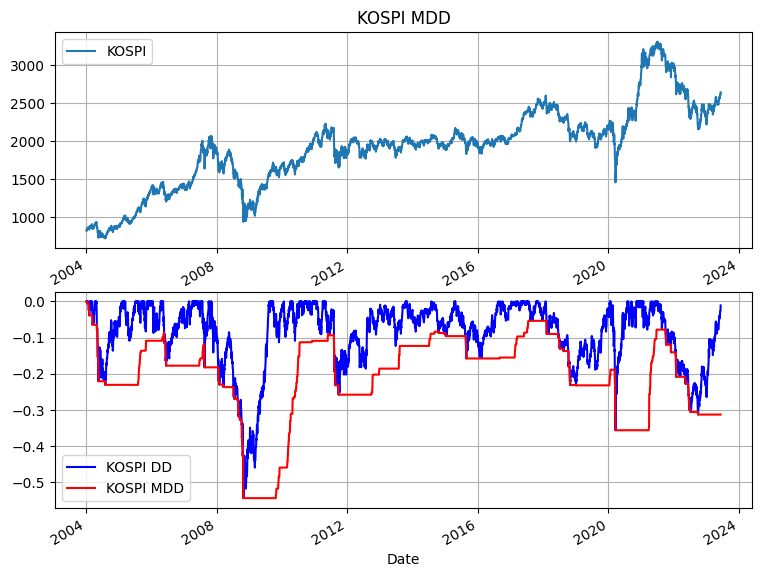

In [43]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252  # 1 year
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()  # min_periods=1(day); calculates max. daily. 
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()  # as drawdown s are negative, pick the min. value

plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue',label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [58]:
# exact value of KOSPI's MDD
max_dd.min()

-0.5453665130144085

In [59]:
# exact dates of KOSPI which touches its MDD
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

So from 2008-10-24 to 2009-10-22, exactly during 1 yr=252 days, KOSPI reached its MDD.

In [57]:
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
hist_max_kospi = kospi['Adj Close'].cummax()
# print(peak, hist_max_kospi)
peak.equals(hist_max_kospi)

False

In [19]:
# print(peak, drawdown, max_dd)

Date
2004-01-05     824.099976
2004-01-06     824.099976
2004-01-07     827.070007
2004-01-08     827.070007
2004-01-09     845.270020
                 ...     
2023-06-02    2685.899902
2023-06-05    2685.899902
2023-06-07    2685.899902
2023-06-08    2670.649902
2023-06-09    2670.649902
Name: Adj Close, Length: 4801, dtype: float64 Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07    0.000000
2004-01-08   -0.003531
2004-01-09    0.000000
                ...   
2023-06-02   -0.031475
2023-06-05   -0.026244
2023-06-07   -0.026174
2023-06-08   -0.022391
2023-06-09   -0.011042
Name: Adj Close, Length: 4801, dtype: float64 Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07   -0.000813
2004-01-08   -0.003531
2004-01-09   -0.003531
                ...   
2023-06-02   -0.313650
2023-06-05   -0.313650
2023-06-07   -0.313650
2023-06-08   -0.313650
2023-06-09   -0.313650
Name: Adj Close, Length: 4801, dtype: float64


# digression:
let's focus on the time till the last day of 2010:

In [50]:
start_date = '2004-01-01'
end_date = '2010-12-31'
tmp_kospi = kospi.loc[start_date:end_date]
tmp_kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05,817.280029,825.429993,816.549988,824.099976,824.099976,408300
2004-01-06,831.260010,831.260010,819.530029,823.429993,823.429993,484100
2004-01-07,826.080017,831.070007,825.229980,827.070007,827.070007,404600
2004-01-08,831.099976,839.280029,824.150024,824.150024,824.150024,428800
2004-01-09,835.419983,849.500000,835.049988,845.270020,845.270020,543300
...,...,...,...,...,...,...
2010-12-24,2040.640015,2042.890015,2027.959961,2029.599976,2029.599976,317400
2010-12-27,2024.560059,2034.619995,2018.750000,2022.189941,2022.189941,282900
2010-12-28,2028.410034,2041.829956,2026.569946,2033.319946,2033.319946,360200


In [51]:
# cummax of kospi during Global Financial Crisis
kospi_GFC_max = tmp_kospi['Close'].cummax()
kospi_GFC_max

Date
2004-01-05     824.099976
2004-01-06     824.099976
2004-01-07     827.070007
2004-01-08     827.070007
2004-01-09     845.270020
                 ...     
2010-12-24    2064.850098
2010-12-27    2064.850098
2010-12-28    2064.850098
2010-12-29    2064.850098
2010-12-30    2064.850098
Name: Close, Length: 1741, dtype: float64

In [52]:
daily_mdd = tmp_kospi['Close'] / kospi_GFC_max - 1.0
daily_mdd

Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07    0.000000
2004-01-08   -0.003531
2004-01-09    0.000000
                ...   
2010-12-24   -0.017072
2010-12-27   -0.020660
2010-12-28   -0.015270
2010-12-29   -0.010345
2010-12-30   -0.006708
Name: Close, Length: 1741, dtype: float64

In [53]:
mdd = daily_mdd.cummin()
mdd

Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07   -0.000813
2004-01-08   -0.003531
2004-01-09   -0.003531
                ...   
2010-12-24   -0.545367
2010-12-27   -0.545367
2010-12-28   -0.545367
2010-12-29   -0.545367
2010-12-30   -0.545367
Name: Close, Length: 1741, dtype: float64

<Axes: xlabel='Date'>

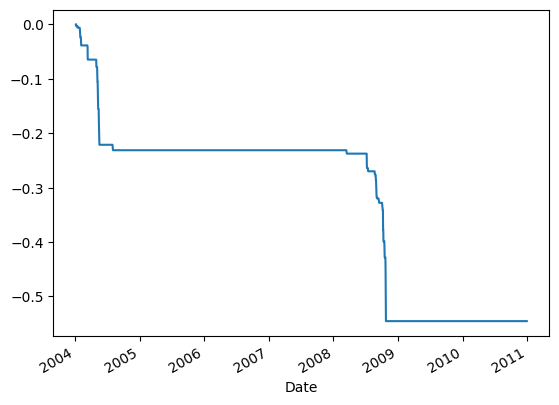

In [54]:
mdd.plot()

<Axes: xlabel='Date'>

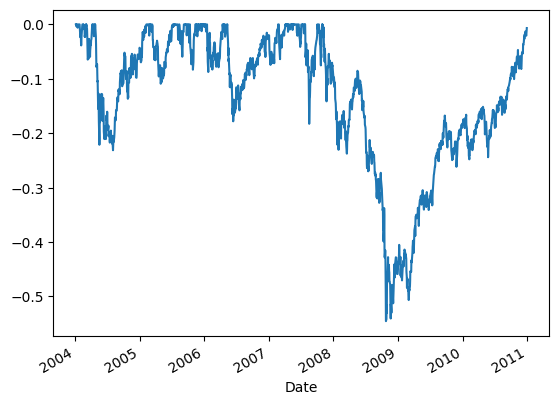

In [55]:
daily_mdd.plot()

## 3.6 regression analysis & correlation 회귀 분석과 상관관계
### 3.6.1 KOSPI vs. DJI comparison

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


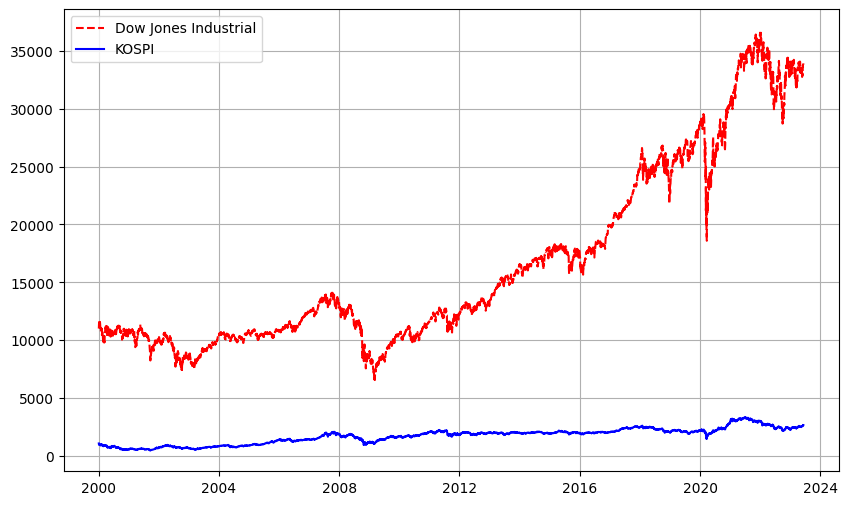

In [35]:
# KOSPI vs. DJI (daily Close Price comparison)
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', start='2000-01-04')

plt.figure(figsize=(10, 6))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')  # may use 'r' instead of 'r--' for convenience
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

likewise, this is misleading: they're based on different scales and standards(weights).

### 3.6.2 지수화 indexation 비교

To remedy this, we compare them via adopting `daily returns`

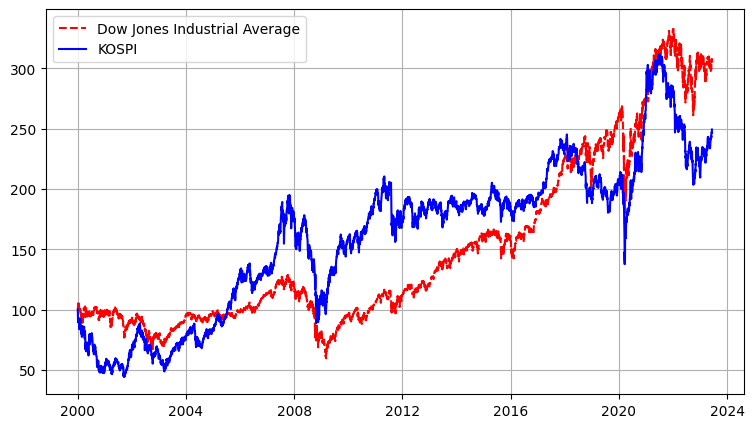

In [37]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 3.6.3 산점도(Scatter plot) 분석
Our objective is to find a correltion between KOSPI(y-axis) and DJI(x-axis)

In [39]:
len(dow), len(kospi)

(5896, 5780)

they have different sizes!. This makes draw scatter plot between them impossible:

ValueError: x and y must be the same size

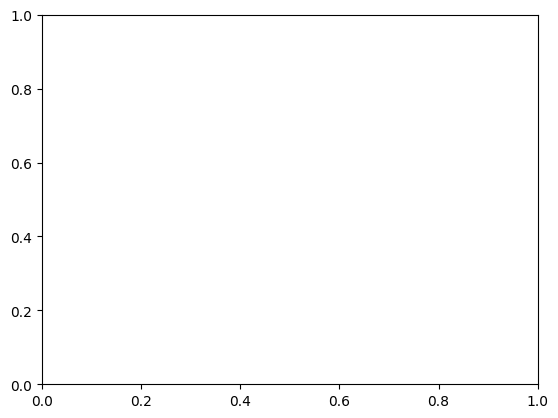

In [40]:
plt.scatter(dow, kospi, marker='.')

Error occurs for: len(dow) $\neq$ len(kospi) <br>
We need to remedy this via filling missing values:

In [42]:
import pandas as pd

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2023-06-05,33562.859375,2615.409912
2023-06-06,33573.281250,NaN
2023-06-07,33665.019531,2615.600098


But this time, NaN's are filled in between, which is not desired for regression analysis:

In [78]:
# backward fill; 2023-06-06 of KOSPI has been filled with the Close price of 2023-06-07
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2023-06-05,33562.859375,2615.409912
2023-06-06,33573.281250,2615.600098
2023-06-07,33665.019531,2615.600098


In [79]:
# forward fill; if there's NaN in the last day, bfill doesn't work.
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2023-06-05,33562.859375,2615.409912
2023-06-06,33573.281250,2615.600098
2023-06-07,33665.019531,2615.600098


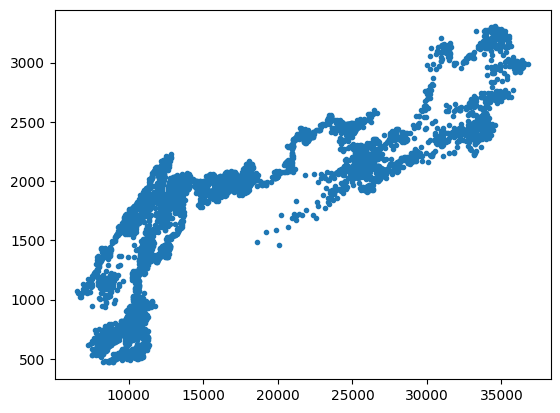

In [80]:
plt.scatter(df['DOW'], df['KOSPI'], marker='.')

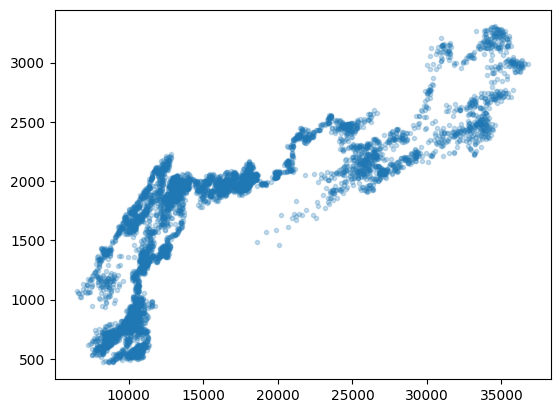

In [81]:
plt.scatter(df['DOW'], df['KOSPI'], marker='.', alpha=0.25)

Okay, there seemss to be a "slight" `linear relation`(or one might say `piecewise linear`) between DJI and KOSPI.

But what are the exact values of this correlation $Cor(\text{DJI, KOSPI})$?

### 3.6.4 SciPy 선형 회귀 분석 Linear regression analysis

In [82]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.06936410681541066, intercept=553.8008916291599, rvalue=0.8229998634230005, pvalue=0.0, stderr=0.0006142455415365495, intercept_stderr=11.314463382719785)

So as of 2023-06-09(starting from 2000-01-04), linear regression is computed as:
$$
    E[Y] = \beta_0 + \beta_1 X = 553.80 + 0.07 X
$$
where $Y=\text{DJI}, X=\text{KOSPI}$.

A digression: do the same for 
1. SPY, DJI and KOSPI.
2. SPY and top 5 companies consisting SPY.
3. 

In [ ]:
# digression
# 1. SPY vs. AAPL

### 3.7 상관계수(Coefficient of Correlation)에 따른 리스크 완화


In [83]:
# corr btwn DataFrame s
df.corr()

,DOW,KOSPI
DOW,1.000,0.823
KOSPI,0.823,1.000


In [84]:
# corr btwn Series
df['DOW'].corr(df['KOSPI'])

0.8229998634230006

In [85]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8229998634230006

R-squared 는 한글로 `결정계수`라고 부른다.

In [86]:
r_squared = r_value ** 2
r_squared

0.6773287751942776

i.e. this means that about 67.74 % of dY is can be explained by dX.

Q) R-square explains the infinitesimal movement in Y by the infinitesimal movement in X with R^2 * 100 (%). Is it possible to extend this notion to `"sufficiently small"` movements in X & Y? By how much extent?

A) May depend on the characteristics (including the scale) of the data in X & Y - axis.

### 3.7.4 DJI와 KOSPI의 회귀 분석
okay move to the next step, let's plot this linear regression:

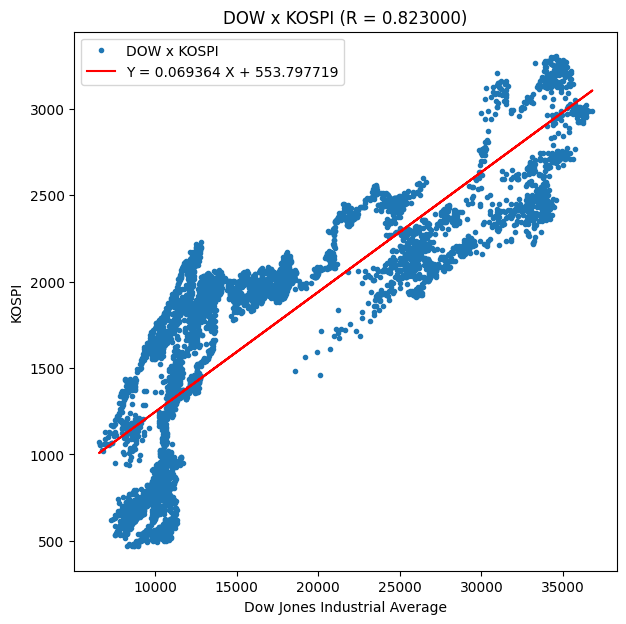

In [91]:
df = pd.DataFrame({'X':dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f} X + {regr.intercept:2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

This shows that $R=0.8230$: doesn't seem to be a good candidate for `diversifying the portfolio`.

Also obtained a linear regression equation as
$$
    Y = 0.0693 * X + 553.7977
$$

Let's do the same for KOSPI vs. TLT(iShares 20 + Year Treasury Bond).<br>
Intuitively R-squared between them are smaller than that of above result(DJI vs. KOSPI):

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


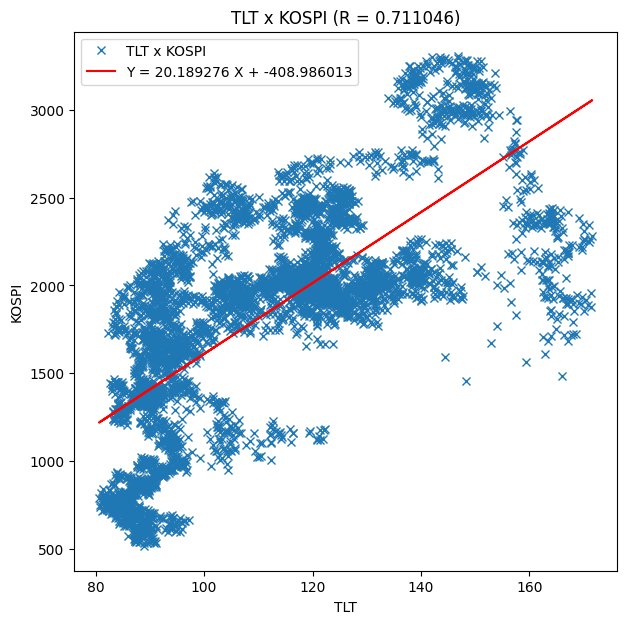

In [124]:
# TLT vs. kospi
TLT = pdr.get_data_yahoo('TLT', '2002-07-30')   
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

df = pd.DataFrame({'X':TLT['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f} X + {regr.intercept:2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, 'x')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('TLT')
plt.ylabel('KOSPI')
plt.show()

For further investigation, let's make this into a definition:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


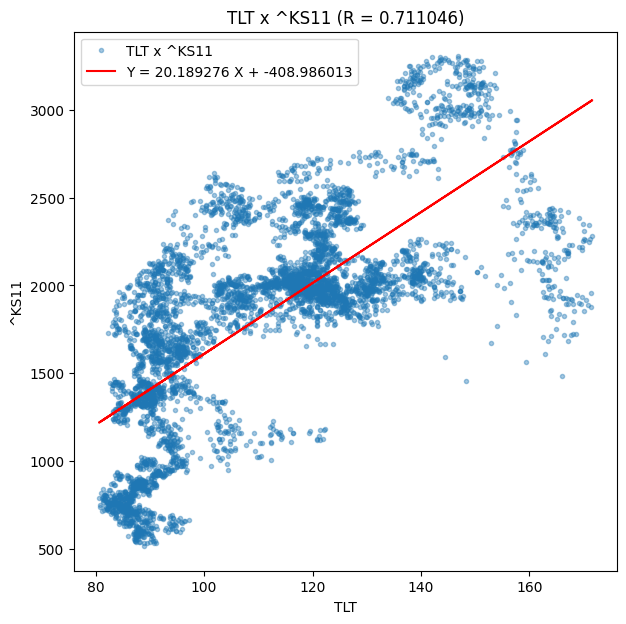

In [126]:
# import pandas as pd
# import pandas_datareader as pdr
# import matplotlib.pyplot as plt
# import scipy.stats as stats

def linreg_plot(asset1, asset2, start_date):
    asset1_data = pdr.get_data_yahoo(asset1, start_date)
    asset2_data = pdr.get_data_yahoo(asset2, start_date)
    
    df = pd.DataFrame({'X': asset1_data['Close'], 'Y': asset2_data['Close']})
    df = df.fillna(method='bfill')
    df = df.fillna(method='ffill')

    regr = stats.linregress(df.X, df.Y)
    regr_line = f'Y = {regr.slope:2f} X + {regr.intercept:2f}'

    plt.figure(figsize=(7, 7))
    plt.plot(df.X, df.Y, '.', alpha=0.4)
    plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
    plt.legend([f'{asset1} x {asset2}', regr_line])
    plt.title(f'{asset1} x {asset2} (R = {regr.rvalue:2f})')
    plt.xlabel(asset1)
    plt.ylabel(asset2)
    plt.show()

linreg_plot('TLT', '^KS11', '2002-07-30')

AAPL vs. S&P 500

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


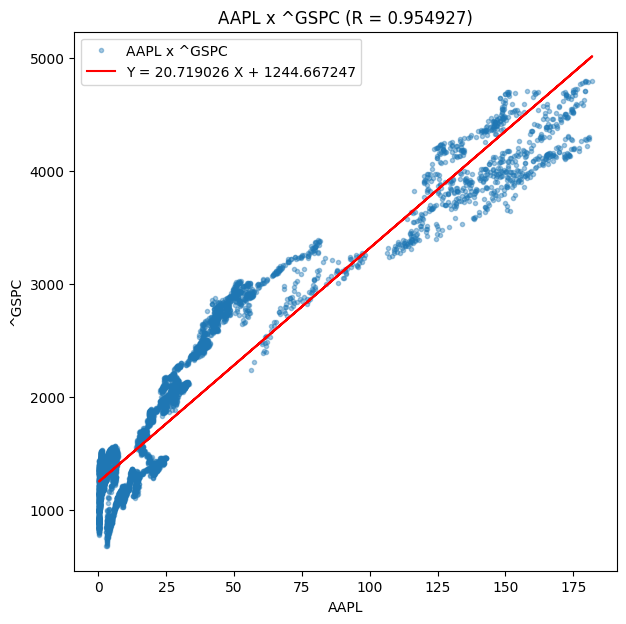

In [127]:
linreg_plot('AAPL', '^GSPC', '2000-01-04')

one may try ^SPX, instead of ^GSPC:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


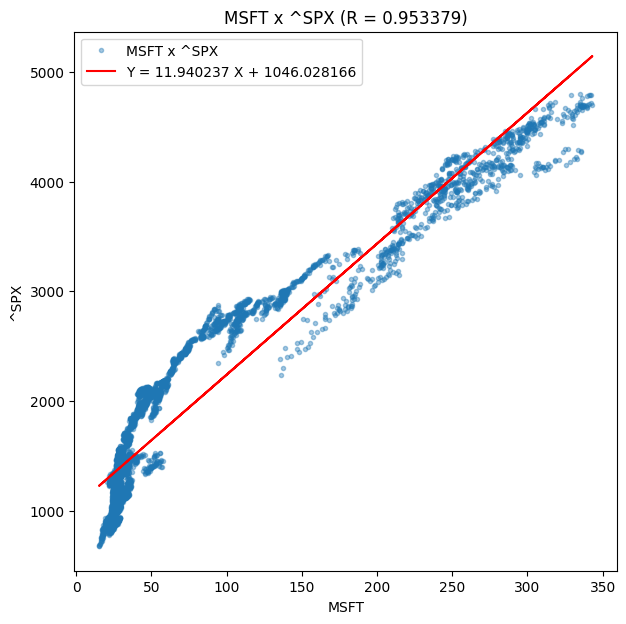

In [129]:
linreg_plot('MSFT', '^SPX', '2000-01-04')

well, what about MSFT vs AAPL?:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


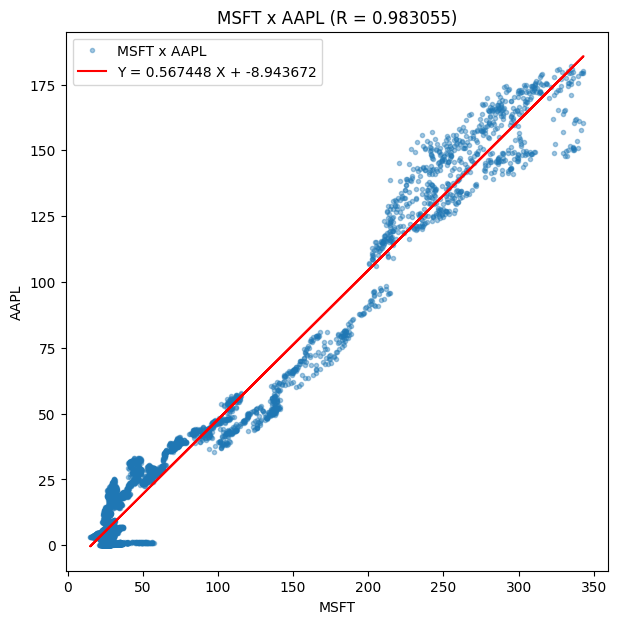

In [130]:
linreg_plot('MSFT', 'AAPL', '2000-01-04')

or Coca-Cola(`'KO'`) vs Pepsi(`'PEP'`)?, which is a classical example for pairs-trading:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


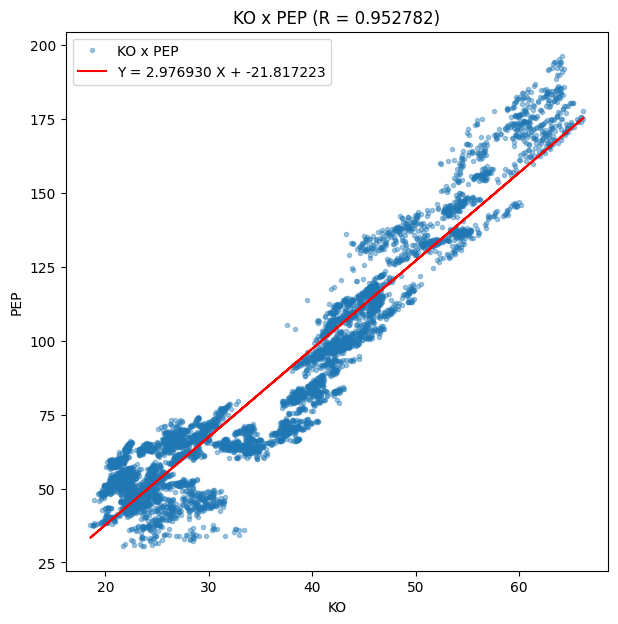

In [133]:
linreg_plot('KO', 'PEP', '2000-01-04')




### 3.7.5 상관계수에 따른 리스크 완화

Q) How about constructing a portfolio consisting of ^SPX, TLT, GLD and etc.?